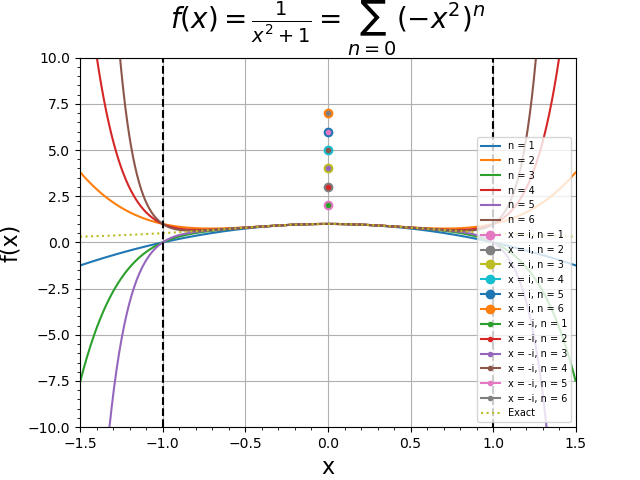

In [100]:
# agnesi_witch.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import sympy as sym
import numpy as np
from matplotlib.ticker import AutoMinorLocator
import sys
import os

def agnesi_eqn(x): #exact agnesi equation
    return 1 / (x ** 2 + 1)

def plot(ax):
    x = np.linspace(-1.5, 1.5, 1000, endpoint=False) #domain is from -1.5 to 1.5, chopped
    #up in 1000 subdomains, and we exclude the endpoints
    powers = [0] * 7
    powers[0] = 1
    for num in range(1, 7): #generate a list of power series expansions, increasing n 
        #each time, take the above x array as input
        term = (-x ** 2) ** num
        powers[num] = powers[num-1] + term
    powers.pop(0) #we don't care about n=0 term
    for i, y in enumerate(powers):
        ax.plot(x, y, label=f'n = {i+1}')
        
    z = 1j
    cpowers = [0] * 7
    cpowers[0] = 1
    for num in range(1, 7): #generate the same list of power series expansions, but 
        #the input is i
        cterm = (-z ** 2) ** num 
        cpowers[num] = cpowers[num-1] + cterm
    cpowers.pop(0)
    for i, y in enumerate(cpowers):
        ax.plot(z, y, marker='o', label=f'x = i, n = {i+1}')
        
    z = -1j
    cpowers = [0] * 7 #input of -i for the power series
    cpowers[0] = 1
    for num in range(1, 7):
        cterm = (-z ** 2) ** num
        cpowers[num] = cpowers[num-1] + cterm
    cpowers.pop(0)
    for i, y in enumerate(cpowers):
        ax.plot(z, y, marker='o', markersize=3, label=f'x = -i, n = {i+1}')
        
    
    ax.plot(x, agnesi_eqn(x), label='Exact', linestyle='dotted')
    #ax.plot(1j, agnesi_eqn(1j), color="red",
        #marker="o", label="x = i")  #this causes division by zero
    ax.set_title(r"$f(x) = \frac{1}{x^2 + 1} = \sum_{n=0}^{\infty}$" 
                 r'$(-x^2)^n$', fontsize=20)
    #to be more precise, I should put the domain in the title (because the two functions
    #are only equal in the domain -1 < x < 1). But I don't want to clutter up the title 
    #any more than it currently is
    ax.set_xlabel("x", fontsize=16)  # label x axis as x
    ax.set_ylabel("f(x)", fontsize=16)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-10, 10)
    ax.axvline(-1, color="black", linestyle="--") #this is the interval of convergence
    #for the power series
    ax.axvline(1, color='black', linestyle='--')
    ax.grid()
    ax.xaxis.set_minor_locator(AutoMinorLocator())  # x axis tick spacings
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.legend(loc='lower right', prop={'size': 7})

def main():
    fig = plt.figure(os.path.basename(sys.argv[0]))
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)  
    plt.show()
   
main()

#This function shows interesting behavior at the endpoints. Agnesi's witch function for 
#a = 1/2 reduces to the derivative of arctan(x). In the interval -1 < x < 1, the power
#series for f(x) is convergent. Since a geometric series is divergent at the above
#boundaries, the more terms we add to the power series the faster the function takes off 
#to infinity at the boundaries. 

#A more formal explanation involves Runge's Phenomenon, where the error of an inter-
#polating polynomial (with degree n) between successive points increases to infinity 
#with n.

#Passing x= +/- i into the series expansion, it's clear the series diverges (to positive
#infinity) at these points. This is not unexpected considering f(i) blows up (division 
#by zero)